In [1]:
!git clone https://github.com/liuzey/CheckGPT-v2.git

Cloning into 'CheckGPT-v2'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 145 (delta 14), reused 29 (delta 9), pack-reused 107 (from 1)
Receiving objects: 100% (145/145), 1.10 GiB | 17.35 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (68/68), done.


In [ ]:
!pip install datasets

## Getting AI and Human Generated text from our dataset



In [13]:
import json
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Load AI-generated texts
with open('CheckGPT-v2/GPABenchmark/CS_TASK1/gpt.json', 'r') as f:
    gpt_data = json.load(f)
ai_texts = list(gpt_data.values())  # <-- fixed here

# Load Human-written texts
with open('CheckGPT-v2/GPABenchmark/CS_TASK1/hum.json', 'r') as f:
    hum_data = json.load(f)
hum_texts = list(hum_data.values())  # <-- fixed here

In [15]:
hum_texts = hum_texts[:150]
ai_texts = ai_texts[:200]

## Loading AuthorMist as a Paraphraser for Testing

In [18]:
import csv
from tqdm import tqdm
import gc
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "authormist/authormist-originality"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

gc.collect()

device = "cuda" if torch.cuda.is_available() else "cpu"

csv_filename = "paraphrased_results.csv"
with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["Original Text", "Paraphrased Text"])

    for i, ai_text in enumerate(tqdm(ai_texts[100:], desc="Paraphrasing texts")):
            prompt = f"""Please paraphrase the following text to make it more human-like while preserving the original meaning.
(Provide ONLY the paraphrased text with no additional commentary or responses)

{ai_text}

Paraphrased text:"""

            inputs = tokenizer(prompt, return_tensors="pt").to(device)

            with torch.no_grad():
                outputs = model.generate(
                    inputs.input_ids,
                    max_new_tokens=512,
                    temperature=0.7,
                    top_p=0.9,
                    do_sample=True
                )

            full_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
            paraphrased_text = full_output.split("Paraphrased text:")[-1].strip()
            print(paraphrased_text)
            csv_writer.writerow([ai_text, paraphrased_text])
            del inputs, outputs
            gc.collect()
            torch.cuda.empty_cache() if torch.cuda.is_available() else None

print(f"Paraphrasing complete! Results saved to {csv_filename}")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Paraphrasing texts:   1%|          | 1/100 [00:05<09:14,  5.60s/it]

This paper studies Nash equilibria of matching markets by looking at stable results of markets where buyers and sellers need to be matched prior to trade. Using game theory and mathematical models, this study looks into conditions under which stable equilibria emerge and factors that may cause instability. The paper also considers implications for real world markets and discusses possible policy interventions that might enhance market performance. Overall this research stresses importance of understanding dynamic features of matching markets to design effective policies that balance efficiency and equity in significant economic systems.


Paraphrasing texts:   2%|▏         | 2/100 [00:11<09:00,  5.52s/it]

This paper analyzes and evaluates the communication infrastructure for real wide area monitoring systems using 3G technology. It looks at performance aspects including reliability, scalability, and efficiency. Literature review and simulation and experiment data are used to conduct this comprehensive analysis. Results show that 3G technology performs well regarding reliability and efficiency for monitoring systems; however scalability is constrained by current network capacity. Results conclude that while this system works well for smaller to medium systems, it may not scale well for large systems. Study provides useful information to designers, researchers, and practitioners concerning design, deployment, and optimization of communication infrastructure for WAMS.


Paraphrasing texts:   3%|▎         | 3/100 [00:18<10:03,  6.22s/it]

This paper introduces a new method for indexing subgraphs in large graphs called Compact Neighborhood Index (CNI). Aimed at reducing storage space compared to previous methods, CNI still retains fast performance for querying subgraphs. It does this by storing neighborhoods of vertices compactly and using a combination of hashing and bit manipulation to efficiently index and query subgraphs. Performance evaluations are conducted using multiple real data sets and compare favorably against leading indexes; the results demonstrate notable reduction in index sizes along with equivalent query performance to other indexes. Furthermore, CNI excels compared to others when dealing with graphs having high clustering coefficients which frequently appear in reality. In summary, this research advances promising development towards building more efficient and scalable indexes for large graphs that will prove valuable in diverse areas including social networks, biology and transport networks.


Paraphrasing texts:   4%|▍         | 4/100 [00:24<10:15,  6.41s/it]

This paper introduces a new method for modeling language using neural networks and trans dimensional random fields. The use of random fields permits flexible and efficient integration of diverse data sources. Specifically, the method uses neural networks to extract features from input data which are then incorporated into a random field model. Resulting model captures complex word and sentence relationships and performs tasks like generation, translation and sentiment analysis. Results on benchmark datasets show this model excels compared to leading models in terms of both accuracy and performance. Generalization also stands out as better. Thus the model works well with out of distribution and noisy data. Overall, this paper offers new insights into language modeling by blending neural networks with random fields; promising improvements for NLP. Results suggest high accuracy and efficiency for this approach.
Deployment of 5G wireless communication systems is critical for many diverse a

Paraphrasing texts:   6%|▌         | 6/100 [00:42<12:17,  7.84s/it]

This paper explores the economic factors contributing to vulnerability and exploitation in today's societies by drawing on interdisciplinary perspectives including economics, sociology, and politics. Using a comparative approach, the paper studies how power dynamics, globalization and neoliberal economic policies affect patterns of vulnerability and exploitation. First, the paper looks at the definition of vulnerability and considers how economic factors like poverty and precarious employment affect both individuals and groups. Then it focuses on mechanisms of trade and exploitation, looking at how globalization and transnational corporations exploit vulnerable populations in the Global South. Next, it analyzes how neoliberal policies exacerbate vulnerability and exploitation. Arguments are made that deregulation, privatization and austerity measures weaken labor protection and social safety nets and leave vulnerable people even more susceptible to exploitation. Ultimately, the conclus

Paraphrasing texts:   7%|▋         | 7/100 [00:50<12:00,  7.75s/it]

This paper introduces a new method for inferring social connections based on individuals' mobility data called "walk2friends." It uses GPS data to derive patterns of movement and identifies and predicts relationships among people. Using a large dataset of real mobility traces collected at a university campus alongside social network connections, the paper evaluates the effectiveness of the proposed approach. Detailed descriptions are given of preprocessing GPS data, construction of mobility profiles and application of a machine learning algorithm for link prediction. Results show that this method performs better compared to other approaches in terms of accuracy and speed. Analysis also considers factors affecting accuracy such as time and space resolution, proximity and interaction frequency, and individual mobility patterns. Results indicate that this method shows promise for inference of relationships and can be applied broadly for various purposes including improving targeting marke

Paraphrasing texts:   8%|▊         | 8/100 [00:55<10:33,  6.88s/it]

This paper examines how reinforcement learning, specifically Q learning, can be applied to financial models including Black Scholes and Black Scholes Merton. An agent called QLBS learns to make optimal decisions regarding portfolio management and evaluates performance against traditional approaches. Results show that QLBS outperforms existing methods with respect to both return and risk management. The study suggests that reinforcement learning has potential in finance and highlights importance of considering changing market conditions when managing portfolios. Results are important contributions toward further development of advanced financial decision making and also practical value to investors and portfolio managers.
This paper investigates how to improve exploration using Evolution Strategies for Deep Reinforcement Learning. Authors introduce a new approach that uses a population of agents that seek novelty to enhance search space exploration. These novelty seeking agents learn to

Paraphrasing texts:  10%|█         | 10/100 [01:09<10:43,  7.15s/it]

This paper looks into how to use machine learning and topological data analysis for classifying chatter during turning operations. Turning often results in chatter which causes poor surface finishes, tool wear and damage to both workpiece and machine tools. This research aims to develop a good system to detect and diagnose chatter accurately and reliably. Research methodology gathers vibration signals during turning and converts them into time frequency representation using wavelets. Time frequency images are analyzed using topological data analysis which extracts unique topological features and chatter patterns. Support Vector Machines and Random Forests are used to train classifiers based on extracted features. Performance evaluation uses metrics like accuracy, precision and recall. Results show the proposed method can distinguish between different types of chatter such as regenerative and forced chatter. Persistent homology feature extraction makes a unique and robust representation

Paraphrasing texts:  11%|█         | 11/100 [01:16<10:45,  7.26s/it]

Using fuzzing has grown more common as a way to discover unknown vulnerabilities during software testing. But traditional fuzzing relies on random inputs which generate a large number of irrelevant test cases that do not reveal new flaws. This paper introduces a novel approach to increase effectiveness by integrating software complexity metrics into fuzzing process. Metrics introduced include code complexity, control flow complexity and data complexity. We use these metrics to guide case generation focusing on areas where vulnerabilities are most likely to occur. Results from experiments on known vulnerable open source software show significant improvement in effectiveness through reduction of irrelevant cases and increase in finding new vulnerabilities. Compared against leading fuzzing techniques our approach consistently performs better in terms of finding vulnerabilities. Study shows effectiveness of incorporating software complexity metrics into fuzzing process for testing. Approac

Paraphrasing texts:  12%|█▏        | 12/100 [01:20<09:18,  6.35s/it]

This paper introduces an innovative way to access secondary spectrum using SINR requirements. Based on transforming restrictions we can use spectrum resources more efficiently. A new method is simulated and compared against traditional approaches regarding serving users and resource efficiency. Results indicate this new method significantly outperforms previous work; thus showing promise for practical implementation. This paper contributes important knowledge to researchers and practitioners working on spectrum management and suggests promising directions for future work on optimization of access to spectrum with SINR criteria.
This paper introduces an improved bound for sub packetization in minimum storage regenerating codes. MSR codes are important for distributed storage systems and consist of redundancy that allows data to be reconstructed from partial failures. A refinement in analysis of this process leads to this new bound which is tighter than previous bounds. The new bound sup

Paraphrasing texts:  14%|█▍        | 14/100 [01:34<09:42,  6.77s/it]

This paper introduces a new approach for scaling up heuristic planning by using relational decision trees (RDTs) as part of the planning procedure. While heuristic planning works well for solving many practical issues, performance drops when dealing with very complicated tasks or large search spaces. RDTs could enhance scalability by making search more efficient and effective. Proposed method uses RDTs to model relationships among different states in the search space and guide the search process. RDTs are learned using a decision tree learning algorithm from a set of examples; this lets them capture complex relationships that simple heuristics might miss. Using learned relationships, RDTs guide selection of promising branches of the search tree. Results of empirical evaluations show that using RDTs greatly improves scalability and performance especially for problems with big search spaces and complex relationships among states. Also performs better compared to leading algorithms on mos

Paraphrasing texts:  15%|█▌        | 15/100 [01:44<11:00,  7.77s/it]

This paper investigates the use of crowdsourcing as a way of generating content for serious games based on scenarios. Serious games are increasingly recognized as effective tools for education across diverse fields such as health care, business, and military training. However, creation of realistic and engaging scenarios is frequently time consuming and costly. Using collective intelligence and creativity of many contributors through crowdsourcing seems promising. The paper reports on a study where a crowdsourcing platform was used to collect content for a serious game designed to teach conflict resolution skills to medical students. Mixed methods were used: quantitative analysis of collected data from the crowd alongside qualitative analysis of user feedback. Results show high quality content from crowd and this content contributes effectively towards the learning tool. Key challenges and limitations also arise when creating content via crowdsourcing like careful moderation, quality c

Paraphrasing texts:  17%|█▋        | 17/100 [01:57<09:36,  6.94s/it]

This paper considers design of mechanisms for auctions where revenue is maximized. Auctions like this are common in telecom and transport sectors, where bidders have different budgets and valuations for the same thing. This paper introduces a new mechanism which considers both bidders' budget constraints and valuations and ensures high revenue for auctioneer. Performance of this mechanism is tested using simulations and compared against other mechanisms from previous literature. Results show this new mechanism performs better than previous ones in terms of revenue and efficiency. Conclusions include important considerations for designing auction mechanisms in real life use cases.


Paraphrasing texts:  18%|█▊        | 18/100 [02:02<08:48,  6.45s/it]

This paper looks into different kinds of faults in machine learning systems and their effect on result accuracy and dependability. It starts by defining what faults mean for machine learning systems, including overfitting, underfitting and data bias. Then this paper systematically analyzes the most frequent faults and the root causes of those faults and offers ways to detect and reduce them. Results show that fault occurrence has a big negative impact on system results accuracy and reliability and stresses the need for careful supervision and evaluation of these systems. At the end the paper suggests directions for further research and practical use of machine learning in business.


Paraphrasing texts:  19%|█▉        | 19/100 [02:08<08:28,  6.28s/it]

This paper introduces a new scalable architecture for decoders specifically targeted at fault tolerant quantum computing. Proposed design aims to resolve issues present in current systems including large scale correction of errors, high computational cost and lack of scalability. This new architecture bases itself on an innovative approach to quantum error correction using many parallel decoder units to perform efficient and scalable correction. Also this design has built in fault tolerance mechanisms to reduce hardware errors and maintain stability and reliability of computation. Results from simulation and experiment evaluations show marked improvements over previous solutions in terms of scalability and fault tolerance along with reduced computational overhead. This new architecture is anticipated to be very important for enabling large scale systems and progress in quantum technology.


Paraphrasing texts:  20%|██        | 20/100 [02:13<08:02,  6.03s/it]

Stable view synthesis is very important in computer vision and graphics. It aims at synthesizing new views based on a set of input images so that they are of high quality and consistent with reality. This paper reviews the leading work regarding this topic, both old and recent methods. Authors assess the pros and cons of different methods and compare them against different datasets and benchmarks. They also consider issues like integration of deep learning, handling complicated and dynamic scenes, and development of interactive and real time systems. Overall, this paper serves as an important reference for researchers and practitioners and underscores how critical stable view synthesis is for diverse applications.


Paraphrasing texts:  21%|██        | 21/100 [02:17<06:51,  5.20s/it]

This paper looks again at removing elements and using a method called Heaviside projection to deal with reintroducing those elements into designs. By doing this it handles issues of both too much density and too little density that are usual problems with existing methods of element removal. Results show that using this new approach yields better optimization outcomes and leads to better performing designs overall.
This paper reviews critically current work on using randomized machine learning for predicting output from renewable energy sources. The review covers leading approaches along with limitations and prospects for further development. Results and new views about how to utilize randomized learning are also discussed. Authors discuss advantages and disadvantages of different randomized approaches and suggest new avenues for future research. The paper ends by reflecting on implications for designing better and more efficient systems for predicting renewable energy.


Paraphrasing texts:  23%|██▎       | 23/100 [02:26<06:15,  4.87s/it]

Convolutional Neural Opacity Radiance Fields (CNORF) is a deep learning approach used to solve problems related to radiance transfer through scattering in the atmosphere. This work introduces an innovative approach using a convolutional neural network to predict radiance fields from scene geometry and atmospheric conditions. The model is trained on a large collection of synthetic scenes and generalizes well to real data. Results indicate that this method outperforms leading approaches both in terms of accuracy and computational speed. Proposed method also has potential application value in remote sensing and real time rendering of scattering effects.


Paraphrasing texts:  24%|██▍       | 24/100 [02:30<05:57,  4.70s/it]

This study examines the idea of consistency within diversity as applied to crowd counting and focuses particularly on partitioning intervals for counts. It aims to go deep into this subject matter and analyze various techniques used for partitioning intervals along with their advantages and disadvantages. Research also looks at how different methods affect accuracy of crowd counting and offers guidance on balancing consistency and diversity in this area. Results from this work can be important for developing better systems for counting crowds and offer useful understanding of the difficulties involved.


Paraphrasing texts:  25%|██▌       | 25/100 [02:34<05:41,  4.55s/it]

This paper introduces a new method for anticipating actions from a first person perspective. Action anticipation involves prediction of future actions based on past actions of an individual. This task is hard because human actions are unpredictable and change constantly. The proposed method integrates computer vision and machine learning techniques to process videos in real time and predict actions as they occur. Results on benchmark data sets show that this method performs well compared to leading approaches; applications include HCI, robotics, and sports analysis.


Paraphrasing texts:  26%|██▌       | 26/100 [02:38<05:25,  4.39s/it]

This paper introduces a framework for safe reinforcement learning using models for intelligent vehicles that consider time varying states and controls. The proposed system integrates model predictive control (MPC) and reinforcement learning to balance between exploration and exploitation and to ensure safety. Results from testing this framework on a simulated scenario show effectiveness in keeping safety while performing better than traditional methods of MPC and RL. This research offers promising solutions for making decisions safely and efficiently in systems with changing constraints.


Paraphrasing texts:  27%|██▋       | 27/100 [02:44<05:49,  4.78s/it]

This paper looks into how Bayesian optimization can be used to optimize both the structure and parameters of function networks. Function networks are mathematical representations that model intricate relations between inputs and outputs. Finding the best configuration of structure and parameters that reduce prediction error relative to actual data is a difficult problem. Bayesian optimization is a framework that uses probability theory for global optimization and has been widely successful in diverse fields such as machine learning. In this paper the authors develop an approach using Bayesian optimization specifically for function network optimization and evaluate its effectiveness using various test cases. Results show that compared to traditional optimization methods, this new approach performs better and offers reliable solutions for optimizing function networks.
Ramsey's theorem is an important mathematical fact which states that monochromatic cliques will exist in any graph colore

Paraphrasing texts:  29%|██▉       | 29/100 [02:53<05:35,  4.72s/it]

This paper investigates the estimation of mixing time for reversible Markov chains using just one sample path. Authors introduce a novel approach which doesn't need multiple paths nor stationary distribution knowledge. They base this new approach on statistical analysis of convergence of sample path distribution to stationary distribution. Results on different examples show that this proposed method gives good mixing time estimates and performs better compared to existing methods. Conclusion states this new method is useful for analyzing mixing times for reversible Markov chains.


Paraphrasing texts:  30%|███       | 30/100 [02:59<05:39,  4.85s/it]

This paper looks at rationality in security decision making by using an analogy of dancing pigs alongside discussion of externalities. The research tries to discern how decision makers manage conflicting interests including cost and public opinion. Quantitative and qualitative methods are used to measure how much security decisions are guided by rational considerations versus external factors like media interest and public pressure. Results show that practical decisions are typically influenced by a mix of rational and irrational factors and that decision makers need to consider carefully the consequences of their actions. The paper ends by proposing ways to improve rationality in security decision making given this context.


Paraphrasing texts:  31%|███       | 31/100 [03:03<05:25,  4.72s/it]

This paper thoroughly evaluates security of mail distribution systems both traditional and modern. It looks at threats such as unauthorized access, theft of data and tampering. An in depth look at security measures currently used like encryption and authentication is provided. Results show current security measures mitigate certain risks but there is still room for enhancement. Authors recommend best practices to improve security along with suggestions for further research in this domain. Results of this work are important for those who depend on secure and reliable mail delivery systems.


Paraphrasing texts:  32%|███▏      | 32/100 [03:07<05:07,  4.52s/it]

This paper introduces a new way to design controllers that perform optimally over an infinite time period for large networks where communications can be unreliable. The focus is on using decentralized control methods that consider limitations on communications and risks of failure to guarantee stability and optimality. This approach merges control theory and networking control to create a broad framework for designing robust controllers. Results from numerical simulation show this new approach works well at high performance levels even when communication is not reliable.


Paraphrasing texts:  33%|███▎      | 33/100 [03:13<05:22,  4.81s/it]

This paper studies stability of linear Structural Equation Models (SEM) in causal inference. SEMs are commonly used for studying complex systems and identifying causal relations between variables. However, stability and robustness against measurement error and omitted variables is an important factor that has to be taken into consideration. The paper thoroughly evaluates stability across different contexts including varying sample sizes, measurement error, and omitted variables. Results indicate that SEMs can be unstable under some circumstances and that measurement error and omission of variables significantly affect stability. Findings from this work are important for ensuring validity and reliability of SEMs in causal inference and suggest direction for future research.
In this paper we introduce an efficient framework for performing amortized Bayesian inference on complicated hierarchical and nonlinear systems. We base this framework on variational inference and take advantage of s

Paraphrasing texts:  35%|███▌      | 35/100 [03:25<06:07,  5.66s/it]

This paper introduces a new approach for producing scalable and realistic datasets for recommendations using fractal expansions. Based on the inherent fractal nature of interaction between users and items this approach uses self similarity properties of fractals to create synthetic data that closely resembles real world scenarios. To evaluate the effectiveness of this approach we compare performance of leading recommendation algorithms using both synthetic and actual data. Results show that the expanded fractal datasets have similar statistical features as real data and also offer an improved scalability and efficiency when generating large datasets. We also study how different expansion parameters affect resulting datasets and give guidance about choosing suitable parameters for various recommendation cases. Limitations and potential future work are also discussed including ways to incorporate temporal dynamics and user feedback into the expansion process. Overall, this approach provi

Paraphrasing texts:  36%|███▌      | 36/100 [03:30<05:54,  5.53s/it]

This paper looks at how well three different ways of allocating information work to improve performance by teams that work on specific tasks. Using experiments with human subjects we find that both elitism (giving information to top performers) and egalitarianism (sharing information equally among all members) work better than welfarism (allocating information to those who need it most). Results indicate that policies that prioritize individual performance work better compared to ones that focus on need. Practical benefits can be drawn from this research for both companies hoping to enhance team performance and government officials creating policies for group settings.


Paraphrasing texts:  37%|███▋      | 37/100 [03:40<07:07,  6.79s/it]

This paper introduces a parallel algorithm for weighted random sampling of large data sets. Sampling proportional to weight is common in statistics, machine learning and data mining as we draw samples from a dataset. The new algorithm makes use of parallel processing and distributed systems to get high performance and scalability. Based on reservoir sampling, which keeps a reservoir of fixed size and randomly replaces elements according to weights, this algorithm is parallelized by partitioning the data into smaller parts and performing reservoir sampling independently on each part. Results from all parts are merged into final sample set. Further improvement is made through dynamic load balancing strategy that fine tunes subset sizes to reduce communication burden and even out workload. Evaluation shows this algorithm excels in efficiency and accuracy using both simulated and real data. Results also indicate high speedup and good scalability as dataset size and computing nodes increase

Paraphrasing texts:  39%|███▉      | 39/100 [03:51<06:08,  6.05s/it]

Quantization bias is an important issue in machine learning that often leads to poor performance of models. This paper introduces a new way of addressing this by using bias itself. Proposed approach includes addition of bias terms during quantization which reduces quantization errors and improves model performance. Results from many experiments on diverse datasets and models show that this proposed approach significantly mitigates quantization bias and achieves higher accuracy compared to other common quantization methods. Insights are also provided regarding tradeoffs between quantization errors and bias and emphasize consideration of both factors during quantization. Results of this work are significant for practical deployment of learned models in constrained resources.


Paraphrasing texts:  40%|████      | 40/100 [03:58<06:24,  6.41s/it]

This paper looks into an approach called Filter Early Match Late (FEML) to boost recognition of places through network based visual place recognition (VPR). The approach works by filtering images to limit the ones compared at later stages when matching occurs. A convolutional neural network is trained to predict the likelihood of a given image pair matching. Images that pass the filter are compared using descriptor matching algorithms. Results show improved performance on the difficult RobotCar Seasons dataset. Robustness to variations like lighting conditions and seasons is also shown. Experiments reveal that learned filters focus on distinctive regions such as edges of roads and facades of buildings which are important for recognition. Insights gained can inform design of future approaches. In summary, the paper shows effectiveness of FEML approach for better network based VPR and also gives useful insights into how the approach works.


Paraphrasing texts:  41%|████      | 41/100 [04:05<06:35,  6.71s/it]

This paper studies creation of smart city IoT services by large collaborations. Increasing demand for smart city service integration of IoT technology allows cities to provide more efficient and sustainable service. Implementation of smart city services is difficult and requires cooperation among different stakeholders including government agencies, private firms and academic institutions. Study looks into challenges and opportunities of large collaboration towards creating such services. Results show that collaboration is important to overcome technical, organizational and regulatory barriers that prevent smart city service implementation. Conclusion is that large collaboration increases efficiency and effectiveness of smart city service development and also helps in developing new services that fit citizens' needs. Insights are provided for policymakers, academics and practitioners involved in smart IoT city service creation. Findings emphasize establishment of effective collaboratio

Paraphrasing texts:  43%|████▎     | 43/100 [04:19<06:12,  6.53s/it]

This paper introduces a new approach for generating realistic facial expressions in three dimensions by using adversarial learning and dense guidance of geometry. Proposed method uses landmark relationships related to facial expressions to direct synthesis and thus yields superior results compared to earlier approaches relying only on appearance features. Adversarial part of this method pushes synthesized expressions closer to the distribution of real expressions and therefore produces more natural and convincing results. Results of evaluations comparing performance are very good, showing that this approach surpasses current top methods in realism and consistency with input geometry. Results show great potential for use across diverse areas such as computer graphics, vision and human interaction.


Paraphrasing texts:  44%|████▍     | 44/100 [04:25<06:00,  6.44s/it]

This paper investigates improving segmentation accuracy in videos captured by unmanned aerial vehicles (UAVs). We focus on using new framework called uvid-net that integrates time information. We propose a method based on 3D convolutional neural networks to extract spatio-temporal features from video frames and process them with a feature pyramid network to generate multiscale feature maps. Then a decoder network creates the final segmentation maps. Results show that this new framework outperforms other top methods in terms of accuracy especially on hard distinctions like cars and buildings. Results indicate this framework has potential benefits in applications including urban planning, disaster relief, and precision farming. Using 3D conv nets to incorporate time information greatly enhances segmentation accuracy.


Paraphrasing texts:  45%|████▌     | 45/100 [04:30<05:36,  6.12s/it]

This research introduces a systematic process for designing industrial specific languages. It includes four main stages: domain analysis, language definition, implementation and deployment. In domain analysis phase, experts from both the domain and language engineering teams work together to define important concepts and related language features. Language definition stage defines these features using a meta language and they are tested against certain quality standards. Implementation phase transforms those defined features into executable code. Finally, in deployment phase, the resulting language is installed into target environments and measured on effectiveness. Results of applying this process to various industrial sectors show that this process produces high quality and efficient languages.


Paraphrasing texts:  46%|████▌     | 46/100 [04:35<05:03,  5.62s/it]

This paper introduces a pipeline for automatic extraction of statistical reports and experimental conditions from scientific articles using machine learning. The pipeline has three main parts: a preprocessing component that cleans and organizes raw text; a module that detects and extracts statistical reports from preprocessed text; and another one that extracts relevant experimental conditions associated with detected statistical reports. Evaluation results show high precision and recall when extracting reports and conditions. Proposed pipeline greatly simplifies this task by automating key information extraction, thus improving the efficiency of research.
This paper introduces an innovative approach to reliably detect compressed and encrypted data. Such detection problems occur frequently, such as identifying harmful content in network traffic or detecting secret information in forensic analysis. Current detection methods have shortcomings regarding accuracy, efficiency, or specificit

Paraphrasing texts:  48%|████▊     | 48/100 [04:47<05:08,  5.92s/it]

This paper investigates weaknesses in machine learning systems related to image scaling attacks and suggests a new way to defend against these types of attacks. These attacks alter the sizes and resolutions of images to confuse learning systems and cause them to classify incorrectly. This paper looks at vulnerabilities that are affected by these attacks including ones dependent upon inputs and other attacks like gradient masking and model inversion. It also introduces a new defense method that uses adversarial examples that have been crafted carefully to mix into the data. Experiments on various benchmark datasets show that this defense succeeds in defending against diverse attack scenarios. Overall this research stresses the importance of understanding the interaction among different vulnerabilities in ML systems and proposes a new defense method that mitigates risks of attacks based on image scaling.


Paraphrasing texts:  49%|████▉     | 49/100 [04:55<05:40,  6.68s/it]

This paper looks into using methods based on graphs for predicting relationships between human phenotypes and genes. Phenotypes are observable traits like body characteristics and biochemical properties of individuals; genes are the hereditary instructions that underlie those traits. Relationships between phenotypes and genes tend to be complicated and hard to predict and understanding them better can help understand disease development and treatment. Using data from public databases which contain associations between genes and phenotypes along with interaction among proteins, researchers apply various methods such as similarity among nodes, paths and factorization matrices to predict new associations. Performance of different methods is measured through cross validation and standard metrics. Results show that graph based methods work well in predicting new associations and performance improves when methods are combined. Results suggest that graph methods have potential to predict rela

Paraphrasing texts:  50%|█████     | 50/100 [05:02<05:31,  6.64s/it]

This research paper studies segmentation of objects of interest in videos by using a new method that associates objects with transformers. Transformers are networks used for natural language processing. This research proposes a two step process. First, using a traditional object detector we find objects within video frames. Then we assign each object to a transformer that learns appearance and motion features over time. Transformer outputs embeddings which are used as inputs into a fully convolutional network that produces pixel level segmentation masks. Performance is evaluated against leading datasets and compared to best current methods. Results indicate that linking objects with transformers improves performance and outperforms previous work on many datasets. In summary this research introduces an innovative approach to video object segmentation that integrates benefits of both old CV methods and newer deep learning architectures.
This paper introduces a design strategy based on le

Paraphrasing texts:  52%|█████▏    | 52/100 [05:14<04:57,  6.19s/it]

This paper looks at hidden data practices as they relate to facilities management using an example of a major company. Usually data curation is seen as something technical but this research emphasizes the importance of understanding social and organizational aspects of data curation. Through interviews and observation we find various hidden practices such as informal communications channels, making ad hoc tools and processes, and embedding data into decisions. We argue that these hidden practices are critical for managing facilities effectively but they are usually ignored or not valued enough. At the end we suggest ways for managers to better support and value these hidden data curation activities.


Paraphrasing texts:  53%|█████▎    | 53/100 [05:22<05:19,  6.80s/it]

A long time ago, people have studied how easy or hard it is to solve Constraint Satisfaction Problems (CSPs). This paper looks at CSPs whose solutions must avoid specific sets of constraints called forbidden patterns. We start by defining forbidden patterns as small groups of constraints that cannot be used together. Then we define a family of CSPs based on these forbidden patterns and study their computational difficulty. We find some of them are easy to solve quickly but others are very difficult. Particularly we find that a big class of CSPs becomes easy to solve efficiently even if the number of variables is very large. We also find there is a close connection between how hard a CSP is to solve and what forbidden patterns are used. Results from our work are important for designing algorithms for solving CSPs. Using forbidden patterns can help guide development of efficient algorithms. They also reveal which types of forbidden patterns make CSPs hard and this can inform benchmarking

Paraphrasing texts:  54%|█████▍    | 54/100 [05:31<05:41,  7.43s/it]

An important consideration in communication networks is the embedding capacity for information flow: this is the maximum amount of information that can be transmitted reliably. This paper investigates embedding capacity under renewal traffic, which is a kind of traffic pattern where inter arrival times of successive packets are drawn from a distribution that might vary over time. Based on queueing theory, we derive analytical expressions for different types of channels under renewal traffic. We find that embedding capacity is very sensitive to statistical characteristics of inter arrival time distributions and can behave unexpectedly; for example, capacity decreases with higher arrival rates or becomes infinite for certain parameter ranges. We also study how various system parameters such as channel capacity and noise levels affect embedding capacity. Numerical results indicate that embedding capacity can be greatly improved using coding schemes that exploit temporal structure of this 

Paraphrasing texts:  56%|█████▌    | 56/100 [05:44<05:16,  7.20s/it]

This paper studies how violating assumptions about equal variances affects classifiers designed using linear discriminant analysis (LDA). LDA is a common statistical method used for classification but typically assumes that variance among features is uniform across different classes. This assumption does not hold up well in practical settings. Violations of this assumption can impact classifier performance. Here we develop a new approach that uses weights based on covariance matrices to account for differing variances and compares this method with standard LDA approaches using both simulated and real data at different levels of variance differences. Results indicate that our new method performs better than standard LDA when variance varies among classes. Performance improvement is also seen for classifying real data with varying variance. A procedure is given to choose optimal weight schemes that maximize accuracy. Results point to importance of considering variance heterogeneity and s

Paraphrasing texts:  57%|█████▋    | 57/100 [05:52<05:10,  7.22s/it]

This paper investigates the use of serverless protocols for inventory and tracking using unmanned aerial vehicles (UAVs). We introduce a framework for a serverless inventory and tracking system that enables UAVs to autonomously gather real time inventory data and transmit them to a remote server. Our system includes a UAV equipped with sensors, a local storage module and wireless communication hardware. As the UAV traverses predefined routes it collects data about inventory items and transmits those data to a remote server using serverless protocol. We also discuss benefits and drawbacks of our proposed system like enhanced security, lower latency and scalability. Results from simulations and experiments show feasibility and effectiveness of the proposed serverless inventory and tracking system. Findings indicate that using serverless protocol may indeed provide a promising solution for inventory and tracking using UAVs by offering better security, efficiency and scalability.


Paraphrasing texts:  58%|█████▊    | 58/100 [05:57<04:36,  6.58s/it]

Authors propose use of deep learning for improving auction mechanisms for managing edge computing resources in mobile blockchain networks. They argue current mechanisms are ineffective at handling the fast dynamics of mobile devices and network states. They suggest an approach using deep reinforcement learning which considers factors like congestion, mobility and resource availability for determining best resource allocation. Results from simulation studies compare against traditional auction methods and indicate this new approach significantly increases resource usage efficiency and decreases latency. Overall performance improves. Results point to great potential for deep learning to transform resource management in mobile blockchains and open lines for further study in this field.


Paraphrasing texts:  59%|█████▉    | 59/100 [06:01<03:55,  5.75s/it]

This study investigates a new training method named Viser (for Visual Self regularization). Viser introduces an additional branch into neural nets which learns to reconstruct images. This branch functions as a regularizer that pushes learning towards robust features by penalizing divergence from input image. Results show that Viser improves generalization performance across different benchmarks for image classification. Analysis also shows that this method lets the network acquire significant and discriminating features.
This paper investigates using stochastic gradient methods for optimization online. Often this is important in high dimensions where projection onto a set of constraints is computationally difficult or impractical. The authors present a new algorithm that optimizes convex and submodular functions using stochastic gradients and prove theoretical guarantees for convergence and performance. Results show that this new approach works well and efficiently on diverse optimizat

Paraphrasing texts:  61%|██████    | 61/100 [06:11<03:39,  5.63s/it]

This paper investigates control issues related to multi class queues in the Halfin-Whitt regime. Under this regime, the queues are very busy and performance evaluation focuses on long run behavior. Main goal is to design a policy minimizing long run average cost while also maintaining stability. First, the authors formulate the problem via an MDP framework and use dynamic programming to derive optimal policy. They present a heuristic policy which is simple to apply and has low resource requirements. Performance evaluation uses simulations and compared against the optimal policy. Results show the heuristic policy performs nearly as well as the optimal one and excels over other commonly used policies. Implications and design suggestions are discussed. Conclusions highlight contributions of the study and suggest further avenues for research.


Paraphrasing texts:  62%|██████▏   | 62/100 [06:17<03:30,  5.55s/it]

This paper studies incidence coloring of graphs with high MAD. MAD is a measurement of connectivity of a graph. Incidence coloring assigns colors to both vertices and edges of a graph such that no adjacent vertices or edges share the same color. Research into incidence coloring is relevant to fields such as graph theory and computer science. This work aims to find tight bounds for incidence chromatic numbers of high MAD graphs. We apply diverse techniques such as graph decomposition and algebra to analyze the relationship between MAD and incidence chromatic number. Results give new insight into coloring behavior of high connectivity graphs and advance algorithm development for incidence coloring problems.


Paraphrasing texts:  63%|██████▎   | 63/100 [06:26<04:03,  6.58s/it]

Autoscaling has become important for cloud applications to meet the fluctuating demand of users. Traditionally, autoscaling relies on fixed rules which do not work well with the fluidity of cloud environments. This paper examines two new approaches to autoscaling: one that learns awareness and another that adapts. The one that learns awareness uses machine learning to forecast future demand based on past data and current system status. The adaptive one uses control theory to adjust scaling rules dynamically according to real feedback from the system. For evaluation purposes, experiments were run using an application hosted in the cloud and compared performance against traditional methods. Results indicate both awareness and adaptive autoscaling perform better than previous methods regarding response times and resource use. Adaptive scaling also works better for spikes in demand while awareness works better for long term trend prediction. This research highlights potential benefits of a

Paraphrasing texts:  65%|██████▌   | 65/100 [06:35<03:16,  5.62s/it]

This paper compares how academics and members of society communicate about pandemics. The goal is to look at differences in how information about the pandemic spreads among these groups and to find out what influences their communication preferences. Results show clear distinctions regarding preferred sources of information, level of detail needed, and preferred ways of communicating. Results from this research will help those who make policies and communicate to better understand different groups' needs and preferences during a pandemic and adapt their communications accordingly.


Paraphrasing texts:  66%|██████▌   | 66/100 [06:40<03:03,  5.40s/it]

This paper introduces a new approach to predict how much longer hard disks will last by using bidirectional LSTM networks. Historical operation data of HDDs is used to train deep learning models which estimate remaining useful life (RUL). Bidirectional LSTM is selected as the model structure because it excels at capturing both past and future context in sequence data. Results of experiments demonstrate that this new method performs better than leading methods in accuracy and stability. This paper makes important contributions to predictive maintenance for HDDs and shows great promise for using deep learning for RUL estimation.


Paraphrasing texts:  67%|██████▋   | 67/100 [06:45<02:50,  5.17s/it]

We also broaden the idea of nonextensivity to economics and consider its potential as a tool to model economic systems. By including ideas from nonextensive statistical mechanics we can take into consideration heterogeneity and long range correlations that are usually not taken into account by conventional economic theories. Results show that models using these new methods represent dynamics underlying economic systems more accurately and could lead to better policy design. Thus this work points out importance of integrating statistical mechanics into economics and shows promise to improve our understanding of complicated economic systems.


Paraphrasing texts:  68%|██████▊   | 68/100 [06:49<02:37,  4.93s/it]

This paper introduces a new approach to dynamically allocate network resources online. Proposed method deals with problems of allocating resources according to real time and takes into consideration that network demands vary unpredictably. Method relies on principles of convex optimization and uses a set of online algorithms to achieve near optimal resource allocation. Performance is assessed by extensive simulations and results show effectiveness in terms of resource use and system efficiency versus traditional allocation methods. Approach has great potential to greatly enhance system performance especially when dealing with fast changing conditions.


Paraphrasing texts:  69%|██████▉   | 69/100 [06:53<02:27,  4.74s/it]

This paper introduces Frauddroid as a new system for automatic detection of fraud in Android apps. Using machine learning, this system analyzes app behavior in real time to detect anomalies that signal fraudulent activity. Designed for efficiency and effectiveness, Frauddroid reduces costs and effort involved with manual fraud detection. Results of experiments show high accuracy in spotting fraud while having very low rates of false positives. This system has great promise to greatly enhance security on Android and prevent advertisers from losing money due to fraud.
This paper introduces a way to understand timing traces of partially synchronous systems during runtime. The authors look at exchange of messages and execution of processes and propose a technique to capture and visualize trace data. Results from this study reveal insights into dynamic behavior of such systems; this knowledge helps with debugging and performance analysis. Evaluation using actual systems shows effectiveness 

Paraphrasing texts:  71%|███████   | 71/100 [07:02<02:14,  4.63s/it]

This paper introduces a new approach for automatic segmentation of three dimensional retinal Optical Coherence Tomography (OCT) volumes by enhancing the boundary surfaces. This process starts by applying an enhancement algorithm to improve quality of the boundaries; this enhanced surface then serves as the basis for segmentation processing. Results show that this approach produces accurate and reliable segmentation of retinal tissue from OCT volume data and provides an important tool for retinal disease analysis and interpretation. Research here advances advanced imaging methods and holds promise for better diagnosis and treatment of retinal diseases.


Paraphrasing texts:  72%|███████▏  | 72/100 [07:06<02:00,  4.29s/it]

This paper looks at applying ordinary differential equations (ODE) to Markov Decision Processes (MDPs). It also considers optimizing costs based on Kullback-Leibler divergence (KL). Results are presented via numerical simulation and show this approach provides both efficiency and accuracy compared to traditional methods like dynamic programming. The paper concludes by considering implications for control and decision making and suggests future directions.


Paraphrasing texts:  73%|███████▎  | 73/100 [07:11<02:05,  4.64s/it]

This paper reports on an investigation into transmit beamforming for exploiting interference in Z channel in underlaid cognitive radios. The main thrust of this work focuses on designing and implementing an algorithm which maximizes performance in cognitive radio networks through exploitation of interference present in Z channel. This algorithm uses a combination of game theory and optimization methods; its aim is to enhance performance by optimizing transmission amidst interference. Results of simulation and experimentations indicate significant enhancement of performance including higher capacity and better reliability. Results of this research are important for design and deployment of cognitive radios and also illustrate how transmit beamforming can be a valuable means to boost performance.


Paraphrasing texts:  74%|███████▍  | 74/100 [07:15<01:55,  4.42s/it]

This research introduces a new way to combine evidence from many different sources so we can make better and more reliable decisions. Proposed method considers variability and uncertainty of each source separately and uses a mathematical basis to systematically integrate evidence. Results from simulations indicate this new method excels in both accuracy and reliability, especially handling a high number of sources. Applications of this method are wide ranging including medical diagnosis, recommender systems and data fusion in sensor networks.


Paraphrasing texts:  75%|███████▌  | 75/100 [07:20<01:54,  4.60s/it]

This paper introduces a new adversarially trained Normalized Auto Encoder with Noise (ANNAE) for text generation. ANNAE learns by combining adversarial training and normalization methods to boost quality of generated text. Proposed model combines benefits of auto encoders with a noise layer added to encode process to generate more varied and robust representation of inputs. ANNAE also uses normalization methods to increase stability and convergence during training. Results from evaluation on various benchmark datasets show that ANNAE excels in both quality and diversity of generated text when compared against leading models.
This paper proposes a new approach to improve speech recognition in robots by mimicking localization of sounds through biological bilateral hearing. Authors want to design auditory systems for robots that work like humans so they can better distinguish speech amid noise. The system uses two microphones as ears do to locate sound sources binaurally and isolate targe

Paraphrasing texts:  77%|███████▋  | 77/100 [07:31<01:54,  4.97s/it]

Chest X-ray imaging is important for diagnosing lung diseases but they lack detail which makes smaller lung features hard to see. This paper introduces a new method using deep learning to increase visibility of lung features. We use a fully convolutional neural network (FCNN) that has been trained on a large set of X-rays and corresponding CT scans. Through training the network predicts CT values for each pixel, thus converting low resolution X-rays into high resolution ones. Enhanced images clearly show more details like nodules and blood vessels. Results show that this FCNN approach improves detection of lung features better than before and could also raise the accuracy of disease diagnosis.


Paraphrasing texts:  78%|███████▊  | 78/100 [07:36<01:48,  4.92s/it]

This paper summarizes results of a workshop on Social Robots for Therapy; this event concentrated on investigating autonomy and ethical issues related to using social robots in therapeutic contexts. Participants came from different backgrounds like robotics, psychology and ethics who met to talk about benefits and risks of employing social robots in therapy. Issues discussed included development of clear ethical guidelines for robot use in therapy, design of robots that encourage user independence and impact on human therapy relationships. Concluding remarks called for sustained collaborative work and research into ensuring safety and effectiveness when using social robots as therapy tools.


Paraphrasing texts:  79%|███████▉  | 79/100 [07:42<01:54,  5.44s/it]

This paper introduces a new way of doing volumetric semantic mapping online and calls this approach Panoptic Fusion. It looks at both "stuff" and "things" levels. Panoptic Fusion integrates visual information from a 3D LiDAR sensor and semantic information from 2D RGB images into a single dense environment representation. Proposed approach uses a novel fusion method combining different data types probabilistically. Results are accurate and rich semantically; they enable efficient and effective decisions for robotic tasks. Experimental evaluations have been conducted in diverse indoor and outdoor scenarios, showing this method excels current leading methods. Results show strong performance on segmentation of semantic classes and reconstruction of 3D structure; promising results suggest this method will advance perception capabilities in real world applications very well.


Paraphrasing texts:  80%|████████  | 80/100 [07:48<01:52,  5.62s/it]

This paper introduces a scalable preconditioner using multilevel domain decomposition to solve large scale simulations for neutron transport equations. It uses an algorithm based on subspaces to create a hierarchy of nested domains which capture essential physics of the problem. Adaptive thresholding is incorporated to enhance effectiveness of this coarsening process. Results show the preconditioner reduces iteration counts of Krylov subspace solvers significantly, producing fast and accurate results. Performance and scalability are demonstrated via numerical tests on realistic test cases, such as reactor cores with up to 100 million degrees of freedom. Results demonstrate excellent parallel efficiency and the approach is effective and accurate at solving large neutron transport problems on modern high performance computers.
This paper introduces a new method for learning Lie algebras using unlabelled data pairs. While previous research has focused on Lie algebra learning mathematicall

Paraphrasing texts:  82%|████████▏ | 82/100 [08:00<01:41,  5.66s/it]

This paper introduces new approaches for learning based reflections and beamforming using intelligent reflecting surfaces (IRS). Proposed method uses deep neural networks (DNNs) to estimate channels and direct signals toward target direction at once. DNNs are trained end to end to minimize MSE between desired and received signal. Unlike traditional methods this method does not rely on explicit channel estimation and performs better with more diverse channel models. Simulation results show this approach excels at performance metrics like beamforming accuracy and resistance to channel uncertainty. Results from this work indicate promising future directions for practical implementation of IRSs and suggest further research into design of IRSs based on DNNs.


Paraphrasing texts:  83%|████████▎ | 83/100 [08:05<01:33,  5.51s/it]

This paper studies performance of language tools for fifteen EU official less resource languages. It examines effectiveness of tools in tagging parts of speech, recognizing names of entities, parsing dependencies and translating. Results are compared using various evaluation metrics and show different effectiveness levels across languages and tasks. Areas needing further development of language tools are also identified. Findings of this research are valuable for policymakers and researchers focused on development and support of low resource languages; they contribute to growing literature on language tool development and evaluation for low resource languages and are important to preserve linguistic diversity and promote multilingualism within the EU.


Paraphrasing texts:  84%|████████▍ | 84/100 [08:10<01:24,  5.31s/it]

Cutting edge research on Dynamic Neural Garments studies how to integrate wearable technology with advanced machine learning algorithms. Research seeks to create smarter clothes that adjust to wearer and environment in real time. This paper gives an overview of current best practices in this area including recent advances in making smart garments. Authors look at different methods for creating these garments which include sensors, actuators and learning algorithms. Also discussed are obstacles and limitations that have to be overcome for this technology to become practical. Concluding remarks touch on application possibilities and future research directions for this promising field.


Paraphrasing texts:  85%|████████▌ | 85/100 [08:19<01:35,  6.36s/it]

This paper introduces a new algorithm called PromiPS that performs fast approximate maximum inner product searches in high dimensions. It tackles this challenging issue where search space grows exponentially. The method employs a lightweight index to achieve fast queries while keeping storage needs low. Using a divide and conquer strategy, PromiPS splits high dimensions into subspaces that are easier to search. Hierarchical indexing is used to reduce the number of dot products needed at query time. PromiPS also implements a probabilistic pruning strategy to further decrease the number of dot products. Performance evaluation shows that PromiPS outperforms top competitors in both query time and index size; sometimes it achieves up to ten times speedups and reductions to one hundred times in index size. Results also indicate scalability to large data sets. Overall, this paper presents an important advancement in nearest neighbor search for high dimensions by providing an efficient approac

Paraphrasing texts:  87%|████████▋ | 87/100 [08:35<01:35,  7.38s/it]

This paper looks at how to use Bayesian deep learning techniques to deal with the need for quick intervention by instructors on forums for massive open online courses (MOOCs). MOOCs are very popular because they are easy to access and flexible. But the large number of students taking them makes it hard for instructors to give prompt and personalized feedback especially on forums where students ask questions and seek help. We propose a solution using deep learning models based on Bayesian theory. We consider various factors like nature of the question, time elapsed since posting and level of urgency expressed by students. By including these factors, we can identify urgent questions that instructors should intervene on promptly. Data from a major MOOC platform was used and this solution was compared against other methods. Results show this model outperforms others in terms of accuracy and efficiency, especially in distinguishing urgent questions requiring prompt handling. Results have im

Paraphrasing texts:  88%|████████▊ | 88/100 [08:41<01:22,  6.90s/it]

This paper presents a new benchmark dataset focusing on questions about electronics and an architecture for question answering using multi task learning. The benchmark dataset contains many varied questions and answers about things like smartphones and laptops as well as other consumer electronics. Authors design and implement a framework that uses shared knowledge and representations learned from diverse tasks to improve performance. Results of experiments show this new method performs much better than previous methods both in terms of accuracy and efficiency. Analysis of results also indicates strengths and weaknesses of this new framework. Contributions include development of a new dataset for QA on electronics and introduction of a novel framework based on multi task learning that could work well in other domains too.


Paraphrasing texts:  89%|████████▉ | 89/100 [08:49<01:21,  7.43s/it]

This paper introduces a new approach for training an automatic planner for cardiac MRI using supervision through spatial relationships among different views. The aim is to overcome difficulties encountered when collecting large amounts of annotated data for supervised learning and shortcomings of unsupervised approaches which rely on fixed criteria to select views. Three core components are involved: one selects candidate views based on spatial relations between current and neighboring views; another synthesizes images for selected candidates using a generative model; and finally there is an evaluation component that judges quality using a discriminator network and selects the highest quality view. Experiments have been performed using a public dataset of cardiac MR images. Results show that this method performs better than previous unsupervised methods both in terms of quality and accuracy of view selection. Moreover, performance matches supervised methods that need lots of annotated 

Paraphrasing texts:  91%|█████████ | 91/100 [09:02<01:00,  6.74s/it]

This paper introduces a new way of using posterior matching on Gaussian Multiple Access Channel (GMAC) with feedback. It promises to improve performance compared to traditional decoding methods. Using this method, users code words are matched up with received channel outputs, and feedback is used to refine this match. There is also a quantization step to reduce feedback rate. Theory says that this scheme achieves a better rate region and simulation results show it works well in practice. This new scheme with feedback looks promising for enhancing performance in GMAC communication systems.


Paraphrasing texts:  92%|█████████▏| 92/100 [09:09<00:53,  6.65s/it]

This paper looks at whether Tree Memory Networks (TMNs) are effective tools for modeling long term dependencies in sequential data. Traditional neural nets fail because they have limited memory. TMNs are recursive networks that process long dependencies hierarchically. We compare performance of TMNs against traditional nets using different kinds of sequential data tasks like natural language processing and music generation. Results show TMNs outperform standard nets in capturing long term dependencies and achieve high scores. Visualizing learned hierarchy shows TMNs capture relevant linguistic and musical elements that align with human intuition. We also consider future uses such as language understanding and time series analysis. Results indicate TMNs show promise for modeling long dependencies; this work also sheds light on neural mechanisms related to long term memory processing.


Paraphrasing texts:  93%|█████████▎| 93/100 [09:14<00:44,  6.38s/it]

This paper presents a hybrid network for learning common representations among different kinds of data including text, images, and sound. It combines unsupervised and supervised learning to deal with challenges of embedding diverse types of data into a single space and retaining important features of each type. Unsupervised part learns common features using a cross modal auto encoder; supervised learning uses a classifier to boost discrimination power of the network. Results on various benchmarks show that this hybrid network performs better compared to leading techniques on retrieval and classification tasks. Conclusion is drawn that hybrid transfer network enables effective integration of information from different data types and will be useful for diverse downstream applications like recommendation and search.


Paraphrasing texts:  94%|█████████▍| 94/100 [09:22<00:40,  6.74s/it]

This paper introduces Cryptoguard, a tool designed to precisely find cryptographic vulnerabilities in large Java projects. Cryptography is critical for protecting data but introducing flaws can cause serious issues. Large software projects pose a challenge when searching for these flaws manually. Cryptoguard uses static analysis to automatically detect misuse of cryptographic APIs such as using weak crypto algorithms or incorrect key sizes. Rules based on good practice and standards guide Cryptoguard to highlight potential vulnerabilities. The tool strives to avoid false positives and reports only real flaws. Evaluation of Cryptoguard against 12 major open source Java projects shows its efficacy at high precision. Results indicate that Cryptoguard finds flaws that other tools miss and that it uncovers new vulnerabilities too. In summary, Cryptoguard is powerful for automatic vulnerability detection in large Java projects. Developers can use it to find and fix vulnerabilities and thus i

Paraphrasing texts:  96%|█████████▌| 96/100 [09:34<00:25,  6.46s/it]

This paper reports on proceedings of the joint 25th International Workshop on Expressiveness in Concurrent Systems and 15th Workshop on Structural Operational Semantics. The workshops brought together specialists in theory of computer science to review recent progress and advances in concurrency and operational semantics. The goal of the workshops was to serve as a forum where researchers could share ideas, present recent results and foster discussion about where the field should go next. The paper summarizes main themes and topics discussed at the workshops, such as expressiveness of concurrent models, development of new techniques for operational semantics and application of those techniques to practical systems. The paper also notes promising new directions resulting from the workshops and makes suggestions for further research in this area.


Paraphrasing texts:  97%|█████████▋| 97/100 [09:39<00:18,  6.09s/it]

This paper studies the development and testing of Odys, a search engine that combines massive parallelism with integrated database management systems and database informed information retrieval. This work seeks to overcome scaling and performance issues of typical engines through the use of DBIR integration into a single system. Results are tested on large data sets and compared to leading search engines. Performance improvements are shown in both query processing speed and retrieval accuracy. Results show that Odys excels relative to current engines. This study adds to the field by showing feasibility and advantages of tight integration between DBMS and IR for large scale search application.


Paraphrasing texts:  98%|█████████▊| 98/100 [09:46<00:12,  6.08s/it]

This paper investigates the relationship between $q$ entropies and generalized Fisher information. Entropies are related to Shannon entropy and they are widely used in areas including statistical mechanics, information theory and signal processing. Generalized Fisher information quantifies the information content regarding an important parameter. The authors prove a Cramér Rao type inequality that relates these two quantities; this inequality sets bounds on variance of unbiased estimators of the parameter via derivatives of $q$ entropy against the parameter. The inequality holds for a wide range of distributions and allows us to derive lower bounds for variance of any unbiased estimator. Results obtained here have wide applicability across different disciplines for designing and analyzing statistical inference methods.


Paraphrasing texts:  99%|█████████▉| 99/100 [09:53<00:06,  6.35s/it]

This paper studies coordinated beamforming in dense wireless cooperative networks as an important issue for high data rates and energy efficiency in modern wireless communications. To solve this problem, we present an algorithm scalable for coordination among multiple base stations and users that also reduces interference from dense deployments. The proposed method uses the sparsity of channel matrices and channel statistics together to jointly optimize beamforming vectors and power distribution among cooperating nodes. Distributed implementation makes this feasible for large networks with many base stations and users. Performance is evaluated using simulations in diverse network scenarios such as varying densities of users and antennas. Results show significant performance improvements over leading beamforming techniques, especially under dense conditions. Overall, we propose scalable and efficient solutions to coordinated beamforming for dense wireless cooperation networks; this has 

Paraphrasing texts: 100%|██████████| 100/100 [10:04<00:00,  6.04s/it]

Paraphrasing complete! Results saved to paraphrased_results.csv


# DETECTION

In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import random
from transformers import (pipeline, AutoTokenizer, AutoModel, T5ForConditionalGeneration, T5Tokenizer, AutoModelForCausalLM)

In [20]:
qd = pd.read_csv('paraphrased_results.csv')
qd_texts = qd['Paraphrased Text'].tolist()

In [21]:
qd = pd.read_csv('paraphrased_results.csv')
qd_texts = qd['Paraphrased Text'].tolist()

ai_data = {'text': qd_texts, 'label': 1, 'source': 'AI'}
human_data = {'text': hum_texts, 'label': 0, 'source': 'Human'}

ai_df = pd.DataFrame(ai_data)
human_df = pd.DataFrame(human_data)
combined_df = pd.concat([ai_df, human_df], ignore_index=True)
random.seed(42)
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.to_csv('combined_texts.csv', index=False)

print("Data preparation complete. Saved to 'combined_texts.csv'")

Data preparation complete. Saved to 'combined_texts.csv'


### RADAR - getting scores

In [44]:
class Radar():
    def __init__(self, device="cuda"):
        self.judge_model = pipeline(
            "text-classification",
            model="TrustSafeAI/RADAR-Vicuna-7B",
            tokenizer="TrustSafeAI/RADAR-Vicuna-7B",
            max_length=512,
            padding='max_length',
            truncation=True,
            device=device,
        )

    def score(self, response_list):
        scores = self.judge_model(response_list)
        return [
            (
                score["score"]
                if score["label"] == "LABEL_0"
                else 1 - score["score"]
            )
            for score in scores
        ]



### DETECTGPT - getting scores

In [45]:
class DetectGPT():
    def __init__(self, device="cpu"):
        self.device = device
        self.judge_model = None

    def _load_model(self):
        if self.judge_model is None:
            print("Loading DetectGPT model...")
            self.judge_model = pipeline(
                "text-classification",
                model="Hello-SimpleAI/chatgpt-detector-roberta",  # Example model
                tokenizer="Hello-SimpleAI/chatgpt-detector-roberta",
                max_length=512,
                padding='max_length',
                truncation=True,
                device=self.device,
            )
            print("DetectGPT model loaded successfully")

    def score(self, response_list):
        self._load_model()
        scores = self.judge_model(response_list)
        return [
            (score["score"] if score["label"] == "1" else 1 - score["score"])
            for score in scores
        ]

In [46]:
df = pd.read_csv('combined_texts.csv')
responses = df['text'].tolist()

def get_scores(judge):
    return judge.score(responses)

In [47]:
judge = Radar()
scores_radar = get_scores(judge)
judge = DetectGPT()
scores_detectgpt = get_scores(judge)

combined_df = pd.read_csv('combined_texts.csv')
combined_df['detectgpt_score'] = scores_detectgpt
combined_df['radar_score'] = scores_radar
combined_df.to_csv('authormist_scored.csv', index=False)

Device set to use cuda


Loading DetectGPT model...


Device set to use cpu


DetectGPT model loaded successfully


In [48]:
combined_df.head()

,text,label,source,detectgpt_score,radar_score
0,Attempt to fully discover the temporal diversi...,0,Human,0.001085,0.020639
1,This paper introduces a new method for inferri...,1,AI,0.007140,0.040706
2,This paper investigates the relationship betwe...,1,AI,0.000322,0.126753
3,This paper investigates control issues related...,1,AI,0.000374,0.129403
4,MIMO processing plays a central part towards t...,0,Human,0.000879,0.009042


### RADAR - getting labels

In [49]:
class Radar():
    def __init__(self, device="cuda"):
        self.judge_model = pipeline(
            "text-classification",
            model="TrustSafeAI/RADAR-Vicuna-7B",
            tokenizer="TrustSafeAI/RADAR-Vicuna-7B",
            max_length=512,
            padding='max_length',
            truncation=True,
            device=device,
        )

    def score(self, response_list):
        scores = self.judge_model(response_list)
        return [score["label"] for score in scores]

### DetectGPT - getting labels

In [50]:
class DetectGPT():
    def __init__(self, device="cpu"):
        self.device = device
        self.judge_model = None

    def _load_model(self):
        if self.judge_model is None:
            print("Loading DetectGPT model...")
            self.judge_model = pipeline(
                "text-classification",
                model="Hello-SimpleAI/chatgpt-detector-roberta",  # Example model
                tokenizer="Hello-SimpleAI/chatgpt-detector-roberta",
                max_length=512,
                padding='max_length',
                truncation=True,
                device=self.device,
            )
            print("DetectGPT model loaded successfully")

    def score(self, response_list):
        self._load_model()
        scores = self.judge_model(response_list)
        return [score["label"] for score in scores]

In [51]:
df = pd.read_csv('authormist_scored.csv')
responses = df['text'].tolist()

def get_scores(judge):
    return judge.score(responses)

In [52]:
judge = Radar()
scores_radar = get_scores(judge)
judge = DetectGPT()
scores_detectgpt = get_scores(judge)

combined_df = pd.read_csv('authormist_scored.csv')
combined_df['detectgpt_labels'] = scores_detectgpt
combined_df['radar_labels'] = scores_radar
combined_df.to_csv('authormist_scored.csv', index=False)

Device set to use cuda


Loading DetectGPT model...


Device set to use cpu


DetectGPT model loaded successfully


In [53]:
combined_df

,text,label,source,detectgpt_score,radar_score,detectgpt_labels,radar_labels
0,Attempt to fully discover the temporal diversi...,0,Human,0.001085,0.020639,Human,LABEL_1
1,This paper introduces a new method for inferri...,1,AI,0.007140,0.040706,Human,LABEL_1
2,This paper investigates the relationship betwe...,1,AI,0.000322,0.126753,Human,LABEL_1
3,This paper investigates control issues related...,1,AI,0.000374,0.129403,Human,LABEL_1
4,MIMO processing plays a central part towards t...,0,Human,0.000879,0.009042,Human,LABEL_1
...,...,...,...,...,...,...,...
245,Human pose estimation is a fundamental yet cha...,0,Human,0.001395,0.009603,Human,LABEL_1
246,This paper investigates the use of crowdsourci...,1,AI,0.006321,0.195242,Human,LABEL_1
247,This paper presents a hybrid network for learn...,1,AI,0.000432,0.049660,Human,LABEL_1
248,Dense Multi-GPU systems have recently gained a...,0,Human,0.007426,0.009725,Human,LABEL_1


## AUROC scores on RADAR and DetectGPT Scores




In [55]:
import numpy as np
from sklearn.metrics import roc_auc_score

auroc_radar = roc_auc_score(combined_df['label'], combined_df['radar_score'])
print(f"RADAR AUROC Score: {auroc_radar:.6f}")
auroc_detectgpt = roc_auc_score(combined_df['label'], combined_df['detectgpt_score'])
print(f"DETECTGPT AUROC Score: {auroc_detectgpt:.6f}")

RADAR AUROC Score: 0.922933
DETECTGPT AUROC Score: 0.435900


# More RADAR Metrics

In [63]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# 1. Convert radar labels into binary labels
binary_predictions = (combined_df['radar_labels'] == "LABEL_1").astype(int)

# 2. Confusion matrix
tn, fp, fn, tp = confusion_matrix(combined_df['label'], binary_predictions).ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# 3. Metrics
precision = precision_score(combined_df['label'], binary_predictions)
recall = recall_score(combined_df['label'], binary_predictions)
f1 = f1_score(combined_df['label'], binary_predictions)
accuracy = accuracy_score(combined_df['label'], binary_predictions)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"Accuracy: {accuracy:.6f}")

# 4. Attack Success Rate (ASR)
# ASR = fraction of "AIs misclassified as Human" = FN / (TP + FN)
asr = fn / (tp + fn) if (tp + fn) > 0 else 0
print(f"Attack Success Rate: {asr:.6f}")


True Negatives: 1
False Positives: 149
False Negatives: 40
True Positives: 60
Precision: 0.287081
Recall: 0.600000
F1 Score: 0.388350
Accuracy: 0.244000
Attack Success Rate: 0.400000


# More DetectGPT Metrics

In [64]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

# 1. Map detectgpt labels to 0/1
binary_predictions = (combined_df['detectgpt_labels'] == "ChatGPT").astype(int)

# 2. Get confusion matrix
tn, fp, fn, tp = confusion_matrix(combined_df['label'], binary_predictions).ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

# 3. Compute metrics
precision = precision_score(combined_df['label'], binary_predictions)
recall = recall_score(combined_df['label'], binary_predictions)
f1 = f1_score(combined_df['label'], binary_predictions)
accuracy = accuracy_score(combined_df['label'], binary_predictions)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.6f}")
print(f"Accuracy: {accuracy:.6f}")

# 4. Attack Success Rate (ASR)
asr = fn / (tp + fn) if (tp + fn) > 0 else 0
print(f"Attack Success Rate: {asr:.6f}")


True Negatives: 149
False Positives: 1
False Negatives: 97
True Positives: 3
Precision: 0.750000
Recall: 0.030000
F1 Score: 0.057692
Accuracy: 0.608000
Attack Success Rate: 0.970000


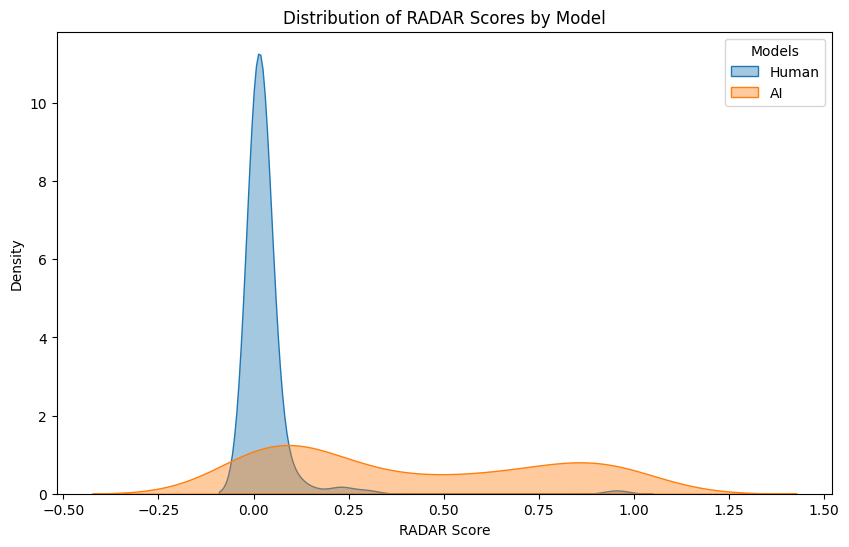

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_col = "source"
score_col = "radar_score"

models = combined_df[model_col].unique()

# Plot KDE for smooth distributions
plt.figure(figsize=(10, 6))
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    sns.kdeplot(subset[score_col].dropna(), label=model, fill=True, alpha=0.4)  # Fill for better visibility

# Add labels and title
plt.xlabel("RADAR Score")
plt.ylabel("Density")
plt.title("Distribution of RADAR Scores by Model")
plt.legend(title="Models")

# Show plot
plt.show()

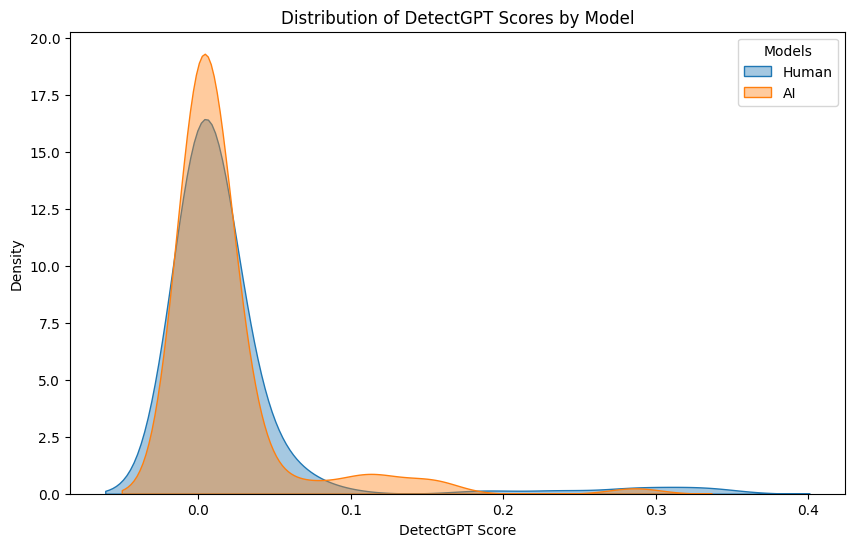

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_col = "source"
score_col = "detectgpt_score"

models = combined_df[model_col].unique()

# Plot KDE for smooth distributions
plt.figure(figsize=(10, 6))
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    sns.kdeplot(subset[score_col].dropna(), label=model, fill=True, alpha=0.4)  # Fill for better visibility

# Add labels and title
plt.xlabel("DetectGPT Score")
plt.ylabel("Density")
plt.title("Distribution of DetectGPT Scores by Model")
plt.legend(title="Models")

# Show plot
plt.show()

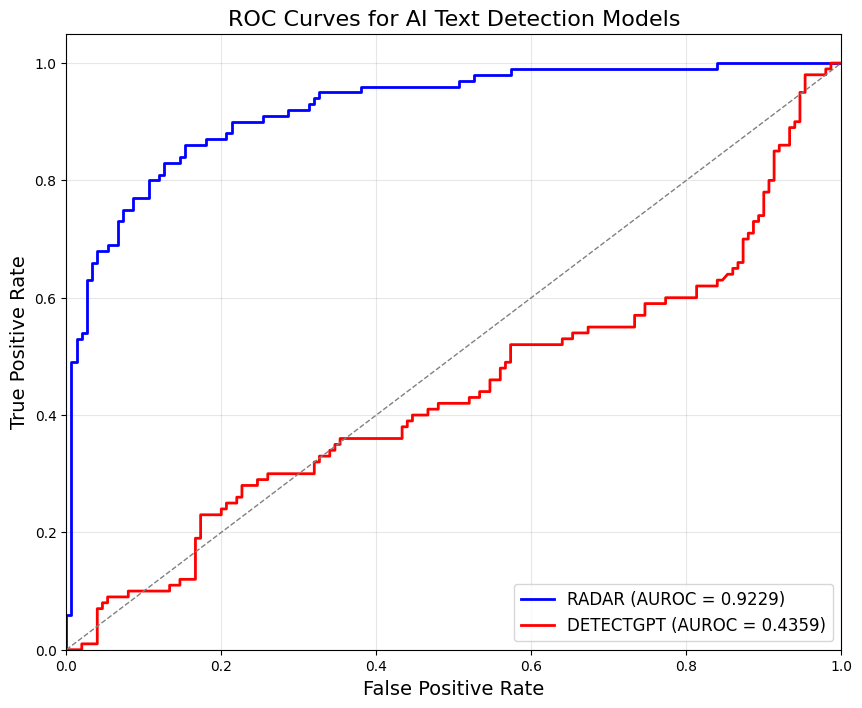

In [60]:
from sklearn.metrics import roc_curve

# Calculate ROC curve points for both detectors
fpr_radar, tpr_radar, _ = roc_curve(combined_df['label'], combined_df['radar_score'])
fpr_wild, tpr_wild, _ = roc_curve(combined_df['label'], combined_df['detectgpt_score'])

# Create a figure with appropriate size
plt.figure(figsize=(10, 8))

# Plot both ROC curves
plt.plot(fpr_radar, tpr_radar, color='blue', lw=2,
         label=f'RADAR (AUROC = {auroc_radar:.4f})')
plt.plot(fpr_wild, tpr_wild, color='red', lw=2,
         label=f'DETECTGPT (AUROC = {auroc_detectgpt:.4f})')

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Add labels and formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for AI Text Detection Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

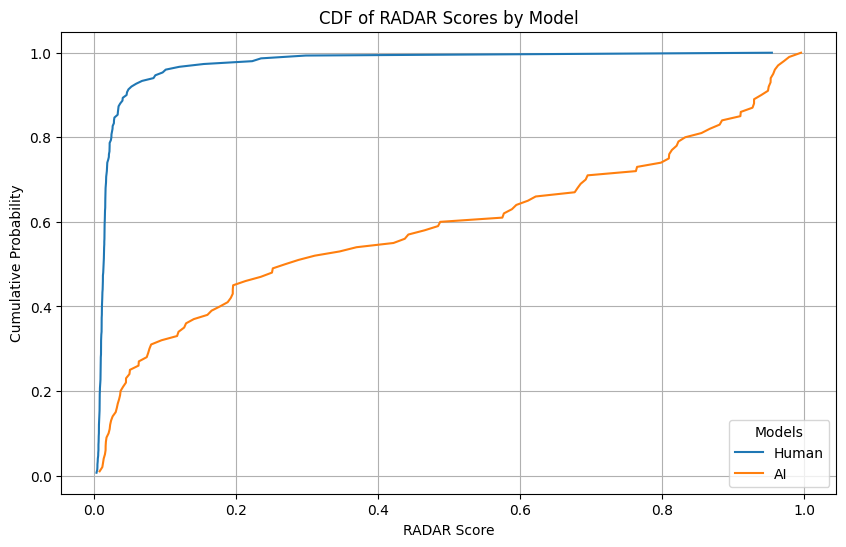

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_col = "source"
score_col = "radar_score"

models = combined_df[model_col].unique()

plt.figure(figsize=(10, 6))

# Loop through Human and AI separately
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    scores = subset[score_col].dropna()
    sorted_scores = np.sort(scores)
    cdf = np.arange(1, len(sorted_scores)+1) / len(sorted_scores)
    plt.plot(sorted_scores, cdf, label=model)

# Add labels and title
plt.xlabel("RADAR Score")
plt.ylabel("Cumulative Probability")
plt.title("CDF of RADAR Scores by Model")
plt.legend(title="Models")
plt.grid(True)
plt.show()


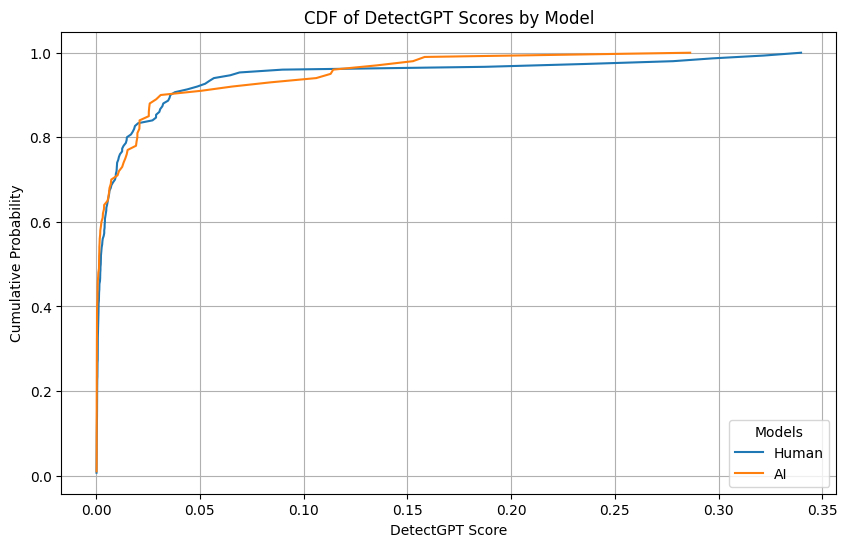

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model_col = "source"
score_col = "detectgpt_score"

models = combined_df[model_col].unique()

plt.figure(figsize=(10, 6))

# Loop through Human and AI separately
for model in models:
    subset = combined_df[combined_df[model_col] == model]
    scores = subset[score_col].dropna()
    sorted_scores = np.sort(scores)
    cdf = np.arange(1, len(sorted_scores)+1) / len(sorted_scores)
    plt.plot(sorted_scores, cdf, label=model)

# Add labels and title
plt.xlabel("DetectGPT Score")
plt.ylabel("Cumulative Probability")
plt.title("CDF of DetectGPT Scores by Model")
plt.legend(title="Models")
plt.grid(True)
plt.show()
